In [ ]:
import numpy as np
import pandas as pd
import math
import requests 
import matplotlib as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader as web
from pandas_datareader import data

In [ ]:
#Create SnP500 scraper: Runs once every year
#Implement ML Algo
#Implement 2 other Algo trading methods

In [ ]:
tick = pd.read_csv("snp500")

In [ ]:
#for i in range(len(tick["0"])): 
#    print(tick["0"][i])
    #print(tick["Ticker"][i])
    #print(data.get_quote_yahoo(tick["Ticker"][i])['marketCap'][0])

In [14]:
final = pd.DataFrame(columns=['Ticker','Date','Open', 'High', 'Low', 'Close', 'Volume','Market Cap','Dividends', 'Stock Splits'])
for i in range(len(tick["0"])):
    print("Producing data for: ", tick["0"][i])
    try:
        d = yf.Ticker(tick["0"][i]).history(period='max')
    except IndexError: 
        print("Couldn't find: ",tick["0"][i])
        continue
    except KeyError:
        continue
    d.reset_index(inplace=True)
    d['Ticker'] = tick['0'][i]
    try:
        d['Market Cap'] = web.get_quote_yahoo(tick["0"][i])['marketCap'][0]
    except IndexError:
        print("Couldn't find market cap for ",tick["0"][i])
        continue
    except KeyError:
        continue
    d = d.iloc[-1]

    #Change to keep only last 2 days!!! get date

    #Append latest value
    final = final.append(
        pd.Series(d,
        index=['Ticker','Date','Open', 'High', 'Low', 'Close', 'Volume','Market Cap','Dividends', 'Stock Splits']), 
        ignore_index = True
    )  

<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  WELL


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  WST


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  WDC


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  WRK


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  WY


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  WHR


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  WMB


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  WTW


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  GWW


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  WYNN


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  XEL


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  XYL


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  YUM


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  ZBRA


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  ZBH


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  ZION


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


Producing data for:  ZTS


<ipython-input-14-bd1a883ea310>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(


<AxesSubplot:>

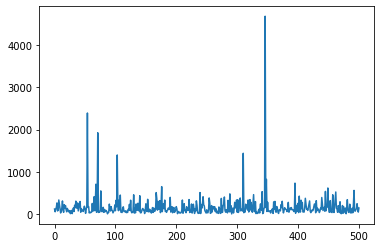

In [17]:
final['Open'].plot()

In [18]:
final

,Ticker,Date,Open,High,Low,Close,Volume,Market Cap,Dividends,Stock Splits
0,MMM,2022-12-23 00:00:00-05:00,120.790001,121.000000,117.800003,120.139999,2609300,66406539264,0.00,0.0
1,AOS,2022-12-23 00:00:00-05:00,56.049999,56.939999,55.840000,56.900002,879500,8692955136,0.00,0.0
2,ABT,2022-12-23 00:00:00-05:00,107.669998,108.400002,107.099998,108.180000,2618400,188619407360,0.00,0.0
3,ABBV,2022-12-23 00:00:00-05:00,163.389999,163.820007,162.330002,163.100006,2684700,288439107584,0.00,0.0
4,ACN,2022-12-23 00:00:00-05:00,265.790009,266.709991,263.309998,266.089996,1213300,167702691840,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
496,YUM,2022-12-23 00:00:00-05:00,128.429993,129.210007,127.839996,128.899994,699700,36309581824,0.00,0.0
497,ZBRA,2022-12-23 00:00:00-05:00,246.860001,249.139999,244.759995,248.220001,180900,12815549440,0.00,0.0
498,ZBH,2022-12-23 00:00:00-05:00,125.940002,126.769997,125.239998,126.690002,789800,26586150912,0.24,0.0
499,ZION,2022-12-23 00:00:00-05:00,48.279999,48.669998,47.990002,48.450001,1263300,7248992256,0.00,0.0


In [ ]:
#Get value of the portfolio
